# CS4035 - Cyber Data Analytics
## Lab 2 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 2 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 


## Group Number : 42

## Student 1 
### Name : Otte van Dam
### ID : 5096790

## Student 2
### Name : Suhaib Basir
### ID : 5059151

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [1]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat
from sklearn.neighbors import LocalOutlierFactor
from datetime import datetime
from sklearn.metrics.pairwise import cosine_distances
from tqdm import tqdm



nb = nbformat.read("Lab2.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 614


## 1. Familiarization task – 1 A4

In [11]:
data = "train_data.csv"
df1 = pd.read_csv(data)
# original_data = df1
# df1 = df1.drop(['Id'], axis=1)

          data types  unique values
Timestamp     object         496800
FIT101       float64           2778
LIT101       float64          10322
MV101          int64              3
P101           int64              2
P102           int64              1
AIT201       float64            549
AIT202       float64           1695
AIT203       float64           5696
FIT201       float64           2879
MV201          int64              3
P201           int64              1
P202           int64              1
P203           int64              2
P204           int64              1
P205           int64              2
P206           int64              1
DPIT301      float64           4854
FIT301       float64           6224
LIT301       float64           9880
MV301          int64              3
MV302          int64              3
MV303          int64              3
MV304          int64              3
P301           int64              2
P302           int64              2
AIT401       float64        

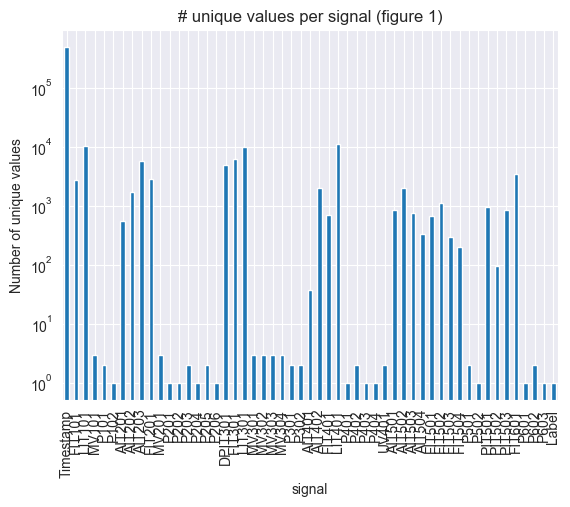

In [3]:
unique_values = df1.nunique()
unique_values.name = 'unique values'

data_types = df1.dtypes
data_types.name = 'data types'

print(pd.merge(data_types, unique_values, left_index=True, right_index=True))

ax = unique_values.plot.bar()
ax.set_yscale('log')
ax.set_xlabel('signal')
ax.set_ylabel('Number of unique values')
ax.set_title('# unique values per signal (figure 1)')

plt.show()

### 1a. Plot visualizations 

C:\Users\ottev\AppData\Local\Temp\ipykernel_40556\3374753188.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1_heat_map.corr(), cmap='coolwarm', ax=ax1)


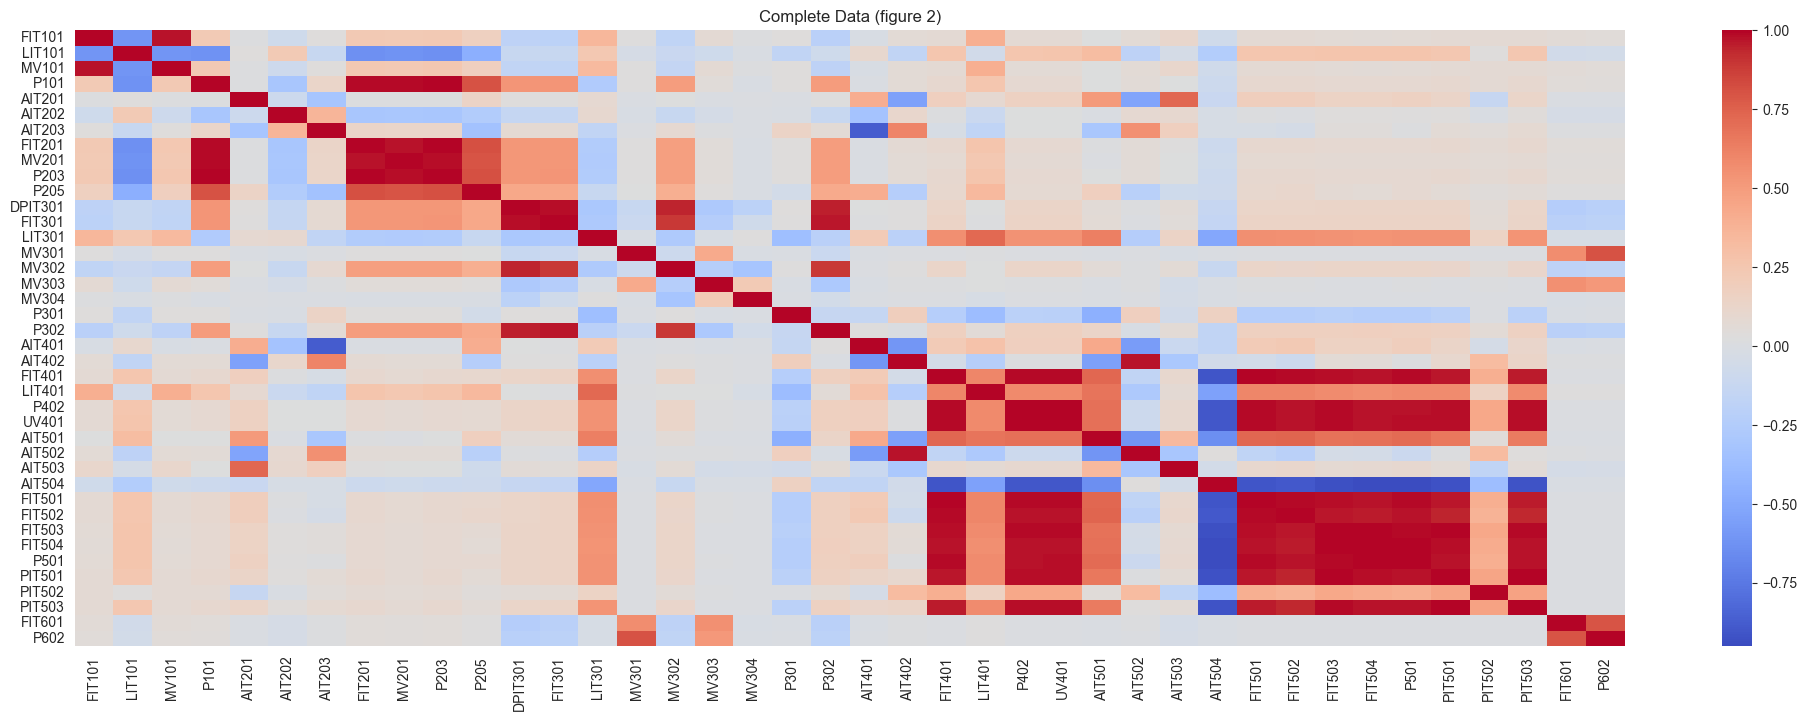

In [4]:
f, (ax1) = plt.subplots(1,figsize =(25, 8))
single_value = []
# Store all the columns with only one unique value since they have no correlation
for i in range(len(df1.nunique())):
    if unique_values[i] == 1:
        single_value.append(i)

df1_heat_map = df1.drop(df1.columns[single_value], axis=1)
sns.heatmap(df1_heat_map.corr(), cmap='coolwarm', ax=ax1)
ax1.set_title('Complete Data (figure 2)')
plt.show()

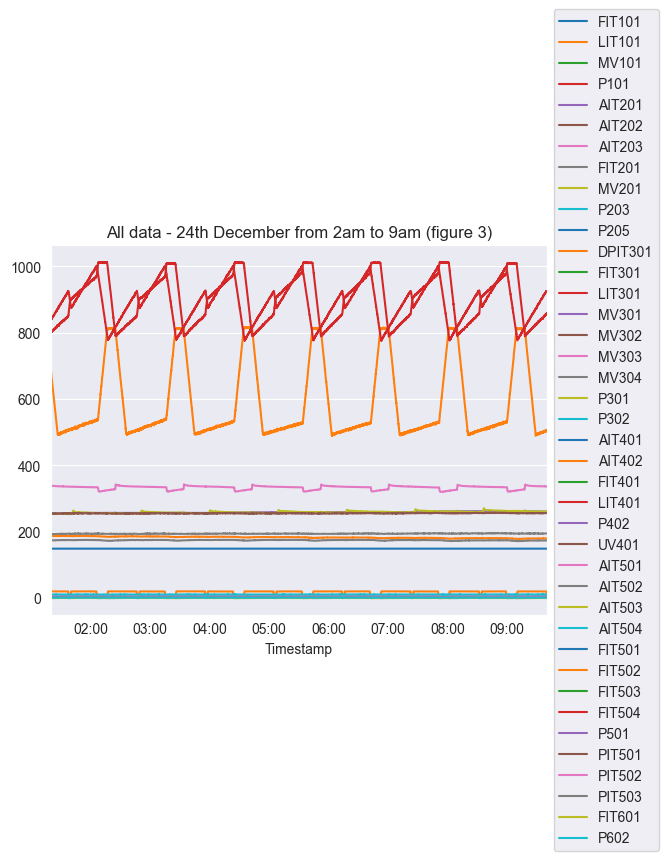

In [5]:
# Convert the timestamp column to datetime objects
df1_first_part = df1[120000:150000].drop(df1.columns[single_value], axis=1)

df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])

# Set the timestamp column as the index of the dataframe
df1_timestamp_indexed = df1_first_part.set_index('Timestamp')
# Plot the dataframe with all the columns on the y-axis
df1_timestamp_indexed.plot()
plt.title('All data - 24th December from 2am to 9am (figure 3)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

##### Cyclic signals - Constant behaviour

C:\Users\ottev\AppData\Local\Temp\ipykernel_40556\3571784978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])


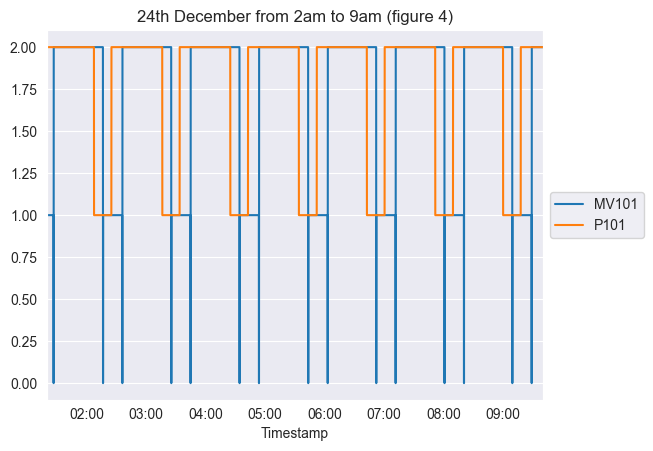

In [6]:
# Convert the timestamp column to datetime objects
df1_first_part = df1[120000:150000]
df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])

# Set the timestamp column as the index of the dataframe
df1_timestamp_indexed = df1_first_part.set_index('Timestamp')
# Plot the dataframe with all the columns on the y-axis
# df1_timestamp_indexed["LIT401"].plot()
# df1_timestamp_indexed["FIT101"].plot()
df1_timestamp_indexed["MV101"].plot()
df1_timestamp_indexed["P101"].plot()

plt.title('24th December from 2am to 9am (figure 4)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

##### Signals with non-constant cyclic behaviour - Oscillations with varying frequency

C:\Users\ottev\AppData\Local\Temp\ipykernel_40556\547299665.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])


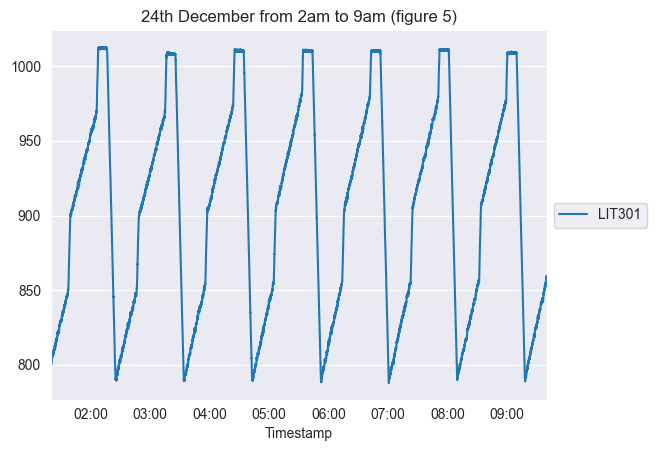

In [7]:
# Convert the timestamp column to datetime objects
df1_first_part = df1[120000:150000]
df1_first_part['Timestamp'] = pd.to_datetime(df1_first_part['Timestamp'])

# Set the timestamp column as the index of the dataframe
df1_timestamp_indexed = df1_first_part.set_index('Timestamp')
#  plot the dataframe with all the columns on the y-axis
df1_timestamp_indexed["LIT301"].plot()
# df1_timestamp_indexed["PIT503"].plot()
plt.title('24th December from 2am to 9am (figure 5)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

##### Random behaviour - blue
##### Generally trending downwards - orange

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


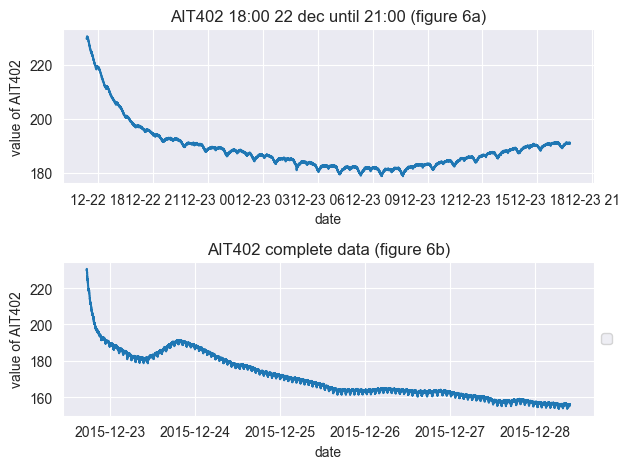

In [9]:
fig, (ax1, ax2) = plt.subplots(2)

timestamps = df1['Timestamp']
timestamps = [datetime.strptime(timestamps[i].strip(), '%d/%m/%Y %I:%M:%S %p') for i in range(0, len(timestamps))]
values = df1['AIT402']

ax1.plot(timestamps[5000:100000], values[5000:100000])
ax2.plot(timestamps[5000:], values[5000:])

ax1.set_title('AIT402 18:00 22 dec until 21:00 (figure 6a)')
ax2.set_title('AIT402 complete data (figure 6b)')

ax1.set_xlabel('date')
ax2.set_xlabel('date')

ax1.set_ylabel('value of AIT402')
ax2.set_ylabel('value of AIT402')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()
del timestamps
del values


### 1b. Answers to the three questions

#### What types of signals are there?
Categorical-like signals: the values of mv101 and p101 can be seen in figure 4. They both take on integer values starting from 0. This seems like they represent a categorical (or binary in case of p101) values.
Continuous values with cycles: LIT301 follows a cycle and takes on different float values.
Signals with changing values: AIT402 shows a cyclic pattern but the value does take on a lot more of unique values as can be seen in figure 6a. The values of the signal goes down over time with some bumps along the way (figure 6b)

#### Are the signals correlated? Do they show cyclic behavior?
From the correlation matrix above (figure 2), we can visualise which signals correlate with each other. From an intial inspection of the heatmap, we can see that most of the values have a correlation value of 0, however, the signals which are correlated with others have a very high correlation value. For example FIT401 almost has a correlation value of 1 with the signals from FIT501 - PIT503.

Furthermore, in the figure 3 we have plotted some of the relevant signals on a randomly chosen data and timeframe (24th December 2am to 9am). Within this time frame we can see that a lot of the signals follow a cyclic pattern. For example, the red and the orange data lines shown above, follow a cycle of around 70 min.

## 2. LOF task – 1/2 A4 – Individual

### 2a. Plot LOF scores

In [ ]:
clf = LocalOutlierFactor(n_neighbors=50)
df1_lof = df1.drop(['Timestamp', 'Label', 'Id'],axis=1)
y_pred = clf.fit_predict(df1_lof)
del df1_lof
indexes_outliers = []
for i in range(len(y_pred)):
    if y_pred[i] == -1:
        indexes_outliers.append(i)

outliers = df1.iloc[indexes_outliers]
del indexes_outliers
outliers = outliers['Id']

y_pred_negative = [y_pred[i] for i in outliers]
y_pred_positive = [y_pred[i] for i in df1['Id'] if i not in outliers]
del y_pred

timestamps = df1['Timestamp']
timestamps_negative = [datetime.strptime(timestamps[i].strip(), '%d/%m/%Y %I:%M:%S %p') for i in outliers]
postive_indexes = range(len(df1))
timestamps_positive = [datetime.strptime(timestamps[i].strip(), '%d/%m/%Y %I:%M:%S %p') for i in df1['Id'] if i not in outliers]
del outliers
del timestamps

### 2b. Analysis and answers to the questions

In [ ]:
# Create scatter plot
plt.scatter(timestamps_negative[::2], y_pred_negative[::2], s=0.03)
plt.scatter(timestamps_positive[::50], y_pred_positive[::50], s=0.03)
print(len(y_pred_negative))
# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Scatter Plot')

plt.show()

In [ ]:
del y_pred_negative
del y_pred_positive
del timestamps_positive
del timestamps_negative

## 3. PCA task – 1/2 A4 – Individual

### 3a. Plot PCA residuals

### 3b. Analysis and answers to the questions

## 4. ARMA task – 1/2 A4 - Individual

### 4a. Print relevant plots and/or metrics to determine the parameters.

### 4b. Plots to study the detected anomalies

### 4c. Analysis and answers to the questions

## 5. N-gram task – 1/2 A4 - Individual

In [ ]:
df1_ngram = df1.copy()
# Strip leading spaces from 'timestamps' column
df1_ngram['Timestamp'] = df1_ngram['Timestamp'].str.strip()

# Convert 'timestamps' column to datetime objects
df1_ngram['Timestamp'] = pd.to_datetime(df1_ngram['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')
#differencing
df1_ngram['differenced_LIT301'] = df1_ngram['LIT301'].diff()

## Without differencing

In [ ]:
# Define the number of bins
num_bins = 15
# Discretize the data using percentiles
df1_ngram['bin'] = pd.qcut(df1_ngram['LIT301'], num_bins, labels=False, duplicates='drop')
# Define the length of the sliding window for N-grams
n_gram_length = 6
M = 5000
# Create sliding windows and extract N-grams
n_grams = []
for i in tqdm(range(len(df1_ngram) - n_gram_length + 1)):
    window = df1_ngram['bin'].iloc[i:i+n_gram_length]
    n_gram = tuple(window)
    n_grams.append(n_gram)

# Add the N-grams to the DataFrame
df1_ngram['n_gram'] = [None] * (n_gram_length - 1) + n_grams
# Group by the larger sliding window and N-gram, and count occurrences
n_gram_counts = df1_ngram.groupby(df1_ngram.index // M)['n_gram'].value_counts().reset_index(name='count')

# Pivot the dataframe
table = n_gram_counts.pivot(columns='n_gram', values='count').fillna(0)
del n_gram_counts
# Calculate pairwise cosine distances
distances = cosine_distances(table)

# Find the nearest neighbor for each row
nearest_neighbors = distances.argsort(axis=1)[:, 1]
nearest_neighbor_distances = distances[np.arange(len(distances)), nearest_neighbors]
del distances


In [ ]:
anomalies = []
for i in range(len(nearest_neighbor_distances)):
    if nearest_neighbor_distances[i] > 0:
        anomalies.append(i)
print(anomalies)

In [ ]:
timestamps = df1['Timestamp'][:52000]
timestamps = [datetime.strptime(timestamps[i].strip(), '%d/%m/%Y %I:%M:%S %p') for i in range(0, len(timestamps))]
values = df1['LIT301'][:52000]

# Plot the values
plt.plot(timestamps, values, color='blue')

# Highlight anomalies with a different color
for idx in anomalies:
    plt.scatter(timestamps[idx], values[idx], color='red')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Plot with Anomalies')

# Show the plot
plt.show()

## With differencing

In [ ]:
# Define the number of bins
num_bins = 10
# Discretize the data using percentiles
df1_ngram['bin'] = pd.qcut(df1_ngram['LIT301'], num_bins, labels=False, duplicates='drop')
# Define the length of the sliding window for N-grams
n_gram_length = 3
M = 25000
# Create sliding windows and extract N-grams
n_grams = []
for i in tqdm(range(len(df1_ngram) - n_gram_length + 1)):
    window = df1_ngram['bin'].iloc[i:i+n_gram_length]
    n_gram = tuple(window)
    n_grams.append(n_gram)

# Add the N-grams to the DataFrame
df1_ngram['n_gram'] = [None] * (n_gram_length - 1) + n_grams
# Group by the larger sliding window and N-gram, and count occurrences
n_gram_counts = df1_ngram.groupby(df1_ngram.index // M)['n_gram'].value_counts().reset_index(name='count')

# Pivot the dataframe
table = n_gram_counts.pivot(columns='n_gram', values='count').fillna(0)
del n_gram_counts
# Calculate pairwise cosine distances
distances = cosine_distances(table)

# Find the nearest neighbor for each row
nearest_neighbors = distances.argsort(axis=1)[:, 1]
nearest_neighbor_distances = distances[np.arange(len(distances)), nearest_neighbors]
del distances

In [ ]:
anomalies = []
for i in range(len(nearest_neighbor_distances)):
    if nearest_neighbor_distances[i] > 0:
        anomalies.append(i)
print(anomalies)

### 5a. Visualise discretization

In [ ]:
# Sort the DataFrame by 'Timestamp' column
df1_ngram = df1_ngram.sort_values('Timestamp')

# Create the line plot
plt.plot(df1_ngram['Timestamp'][1300:1500], df1_ngram['bin'][1300:1500])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Bin')
plt.title('Line Plot')

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()
del df1_ngram

### 5b. Analysis and answers to the questions. Also provide relevant plots.

## 6.Comparision task 1 A4 - Individual

### 6a. Use the given guidelines and provide a comparision of the above implemented methods.

## 7. Bonus Task 1 A4

### 7a. Provide implementation and analysis.